In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

/Users/ron/Desktop/everything/Cancer Detection Project - 1/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
data_dir = "."
dyskeratotic = os.path.join(data_dir, "Dyskeratotic") # cancer
koilocytotic = os.path.join(data_dir, "Koilocytotic") # cancer
metaplastic = os.path.join(data_dir, "Metaplastic") # normal
parabasal = os.path.join(data_dir, "Parabasal") # normal
superficial_intermediat = os.path.join(data_dir, "Superficial-Intermediat") # normal

In [3]:
IMG_SIZE = 128

data = []
labels = []

def load_images(folder, label):
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        try:
            img = cv2.imread(img_path)
            img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            
            data.append(img_resized)
            labels.append(label)
        except Exception as err:
            print(f"Error loading image {img_path}: {err}")
            
load_images(dyskeratotic, 0)
load_images(koilocytotic, 1)
load_images(metaplastic, 2)
load_images(parabasal, 3)
load_images(superficial_intermediat, 4)

data = np.array(data) / 255
labels = np.array(labels)

print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")

Data shape: (25000, 128, 128, 3)
Labels shape: (25000,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (20000, 128, 128, 3)
X_test shape: (5000, 128, 128, 3)


In [5]:
num_classes = 5

model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the results to feed into a dense layer
    layers.Flatten(),
    
    # A fully connected layer
    layers.Dense(128, activation='relu'),

    # Output layer for multi-class classification
    layers.Dense(num_classes, activation='softmax')
])

# Print the model summary to see the architecture
model.summary()

/Users/ron/Desktop/everything/Cancer Detection Project - 1/venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=5,
    validation_data=(X_test, y_test)
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 99s 152ms/step - accuracy: 0.6551 - loss: 0.8677 - val_accuracy: 0.9146 - val_loss: 0.2288
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 140ms/step - accuracy: 0.9308 - loss: 0.1980 - val_accuracy: 0.9396 - val_loss: 0.1613
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 89s 143ms/step - accuracy: 0.9713 - loss: 0.0865 - val_accuracy: 0.9728 - val_loss: 0.0750
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 102s 164ms/step - accuracy: 0.9761 - loss: 0.0734 - val_accuracy: 0.9834 - val_loss: 0.0437
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 103s 165ms/step - accuracy: 0.9877 - loss: 0.0454 - val_accuracy: 0.9900 - val_loss: 0.0338


In [8]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test) 
print(f"Test Accuracy: {accuracy * 100:.2f}%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9886 - loss: 0.0326
Test Accuracy: 99.00%


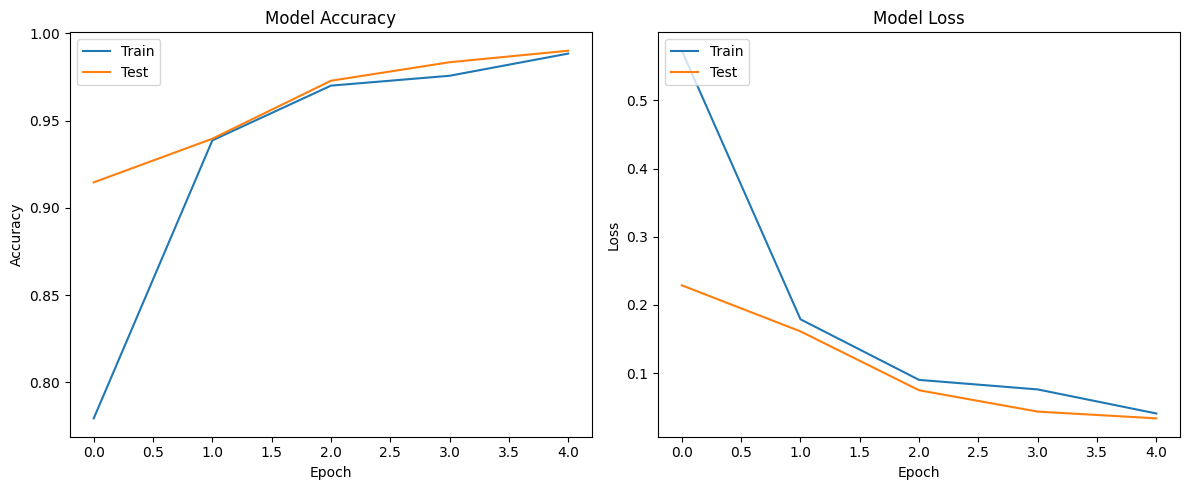

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step


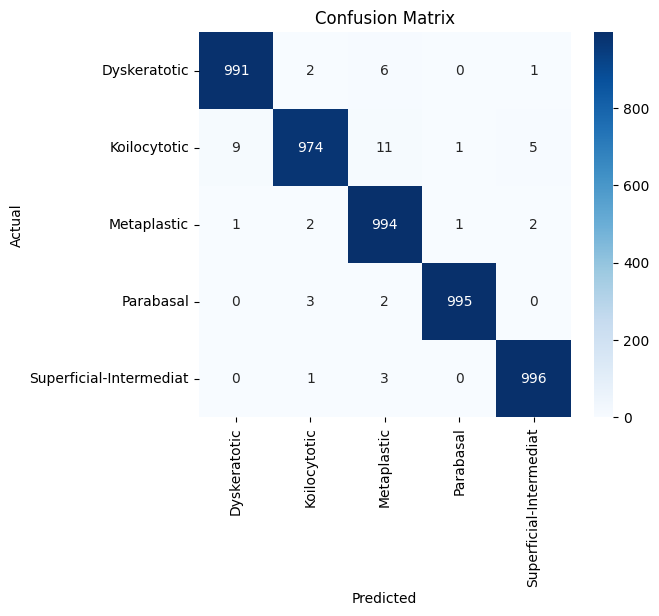


Classification Report:

                         precision    recall  f1-score   support

           Dyskeratotic       0.99      0.99      0.99      1000
           Koilocytotic       0.99      0.97      0.98      1000
            Metaplastic       0.98      0.99      0.99      1000
              Parabasal       1.00      0.99      1.00      1000
Superficial-Intermediat       0.99      1.00      0.99      1000

               accuracy                           0.99      5000
              macro avg       0.99      0.99      0.99      5000
           weighted avg       0.99      0.99      0.99      5000



In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediat'], 
            yticklabels=['Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediat'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print a detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Dyskeratotic', 'Koilocytotic', 'Metaplastic', 'Parabasal', 'Superficial-Intermediat']))

In [ ]:
model.save("cervical_cancer.h5")

In [12]:
from keras.models import load_model

In [13]:
model = load_model("../models/cervical_cancer.h5")

In [14]:
loss, accuracy = model.evaluate(X_test, y_test) 
print(f"Test Accuracy: {accuracy * 100:.2f}%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9894 - loss: 0.0372
Test Accuracy: 98.56%
